<a href="https://colab.research.google.com/github/aakanshadalmia/Home-Credit-Default-Risk--Exploratory-Data-Analysis/blob/main/Home_Credit_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Home Credit Default Risk- Exploratory Data Analysis**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Loading Files

In [ ]:
application_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/application_train.csv')
application_test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/application_test.csv')
bureau = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/credit_card_balance.csv')
previous_application = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/previous_application.csv')
installments_payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/installments_payments.csv')


In [ ]:
previous_application = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Risk/previous_application.csv')

# Functions

## Separate numerical and categorical columns

In [ ]:
def separate_cols(dataset):
    numerical_cols = []
    categorical_cols = []

    for col in dataset.columns:
        if dataset[col].dtype == 'object':
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)

    print("The numerical columns are:",numerical_cols)
    print("The categorical columns are:",categorical_cols)

## Counting the number of null values in a dataset

In [ ]:
def count_null(dataset, fig_size):

    num = pd.isna(dataset).sum()
    perc = num / dataset.shape[0] * 100
    df = pd.DataFrame(columns = ['Number of null values','Percentage of data null'], index = num.index)
    df['Number of null values'] = num
    df['Percentage of data null'] = perc
    df.sort_values(by = 'Percentage of data null', ascending = False, inplace = True)

    df = df[df['Percentage of data null'] > 0]
    
    if len(df) != 0:
        fig, ax = plt.subplots(figsize = fig_size)
        ax.set_xlabel('Column names')
        ax.set_ylabel('Percentage of data null')
        df.plot(y = 'Percentage of data null', kind = 'bar', use_index = True, ax = ax)
        ax.grid(False)

    return df

## Visualize Data Distribution

In [ ]:
def distribution_plots(data, cols):
    
    sns.set_style('whitegrid')
    color = ["#b30000", "#7c1158", "#4421af", "#0d88e6", "#00b7c7", "#5ad45a", "#1a53ff", "#8be04e", "#ebdc78"]

    l = len(cols)
    if l%2 == 0:
        fig, ax = plt.subplots(nrows = l//2,ncols = 2, figsize = (15,5* l//2))
    else:
        fig, ax = plt.subplots(nrows = l//3 ,ncols = 3, figsize = (15,5 * l//3))
    
    plt.subplots_adjust(wspace = 0.4)

    for clr,col,plt_axes in zip(color, cols, ax.flat):
        sns.distplot(data[col].dropna(), kde = True, color = clr, ax = plt_axes)
        #plt_axes.ticklabel_format(style = 'plain', axis = 'x')
        #plt_axes.ticklabel_format(style = 'plain', axis = 'y')
    
    plt.suptitle(f"Distribution of {cols}")

##Visualize count of Categorical Variables

In [ ]:
def plot_categorical(data, col1, col2):
    col1_counts = data[col1].value_counts()
    labels = col1_counts.index
    counts = col1_counts.values

    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))

    ax1.bar(labels, counts)
    ax1.set_xticklabels(labels, rotation = 90)
    ax1.set_title(f"{col1}: Total Customer Count \n")

    ax2.set_title(f"{col1}: Repayer vs Defaulter\n")
    target_values = list(pd.unique(data[col2]))
    columns = target_values.sort()

    df = pd.DataFrame(columns = columns, index=labels)

    for group, groupdf in data.groupby([col2]):
        counts = groupdf[col1].value_counts()
        df[group] = counts

    df.plot(use_index = True, kind = 'bar', ax = ax2, color = ['#5ad45a','#b30000'])

    plt.show()

# **Visualizing Imbalance in application_train Dataset**

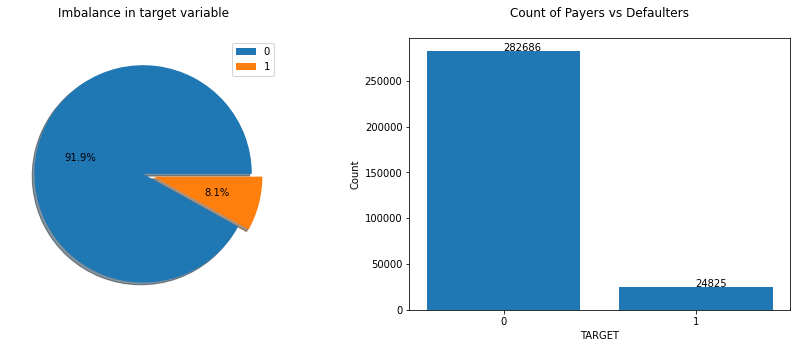

In [ ]:
target_percentage = application_train['TARGET'].value_counts() / len(application_train) * 100
labels = target_percentage.index

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))

ax1.pie(target_percentage.values, autopct = '%1.1f%%', shadow = True, explode = [0,0.1])
ax1.legend(labels)
ax1.set_title('Imbalance in target variable\n')

counts = application_train['TARGET'].value_counts()
ax2.bar(labels, counts)
ax2.set_title('Count of Payers vs Defaulters\n')
ax2.set_xticks(labels)
ax2.set_xticks(labels)
ax2.set_xlabel("TARGET")
ax2.set_ylabel("Count")
for i in range(len(labels)):
    plt.text(i, counts[i], counts[i])

plt.show()

# **Analyzing Datasets**
- **Checking numerical and categorical columns**
- **Visualizing percentage of null data per column for each dataset**

## **Dataset: application_train**

Number of rows in application_train dataset: 307511
Number of features in application_train dataset: 122 

The numerical columns are: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAR

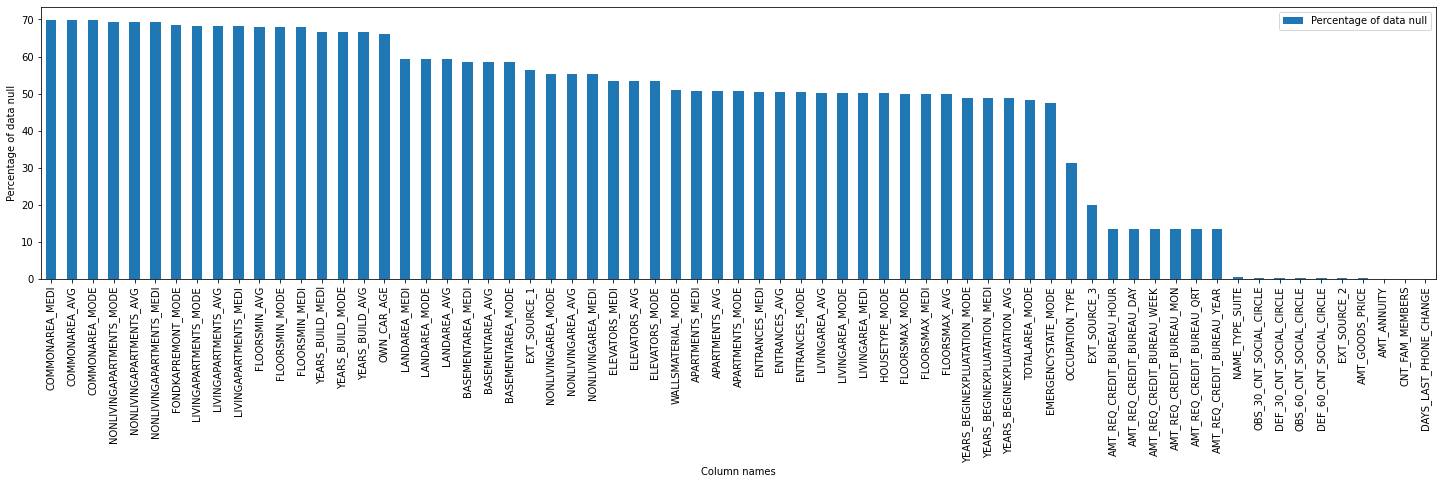

In [ ]:
print("Number of rows in application_train dataset:",application_train.shape[0])
print("Number of features in application_train dataset:",application_train.shape[1],"\n")
separate_cols(application_train)
print("\n")
application_train_null = count_null(application_train, (25,5))

## **Dataset: application_test**

Number of rows in application_test dataset: 48744
Number of features in application_test dataset: 121 

The numerical columns are: ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NON

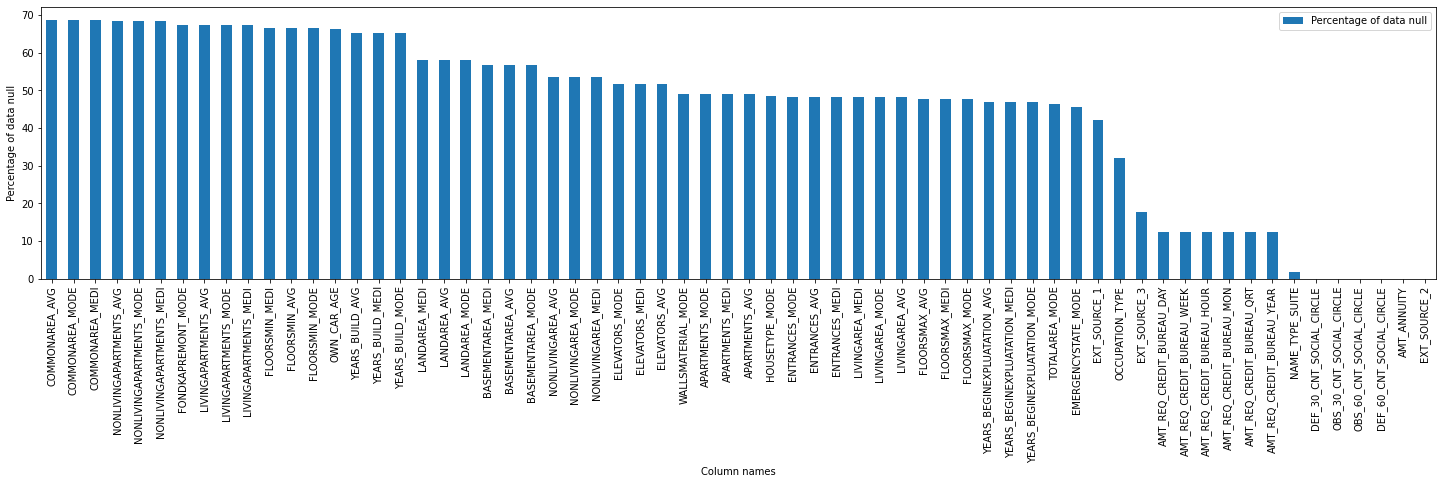

In [ ]:
print("Number of rows in application_test dataset:",application_test.shape[0])
print("Number of features in application_test dataset:",application_test.shape[1],"\n")

separate_cols(application_test)
print("\n")
application_test_null = count_null(application_test, (25,5))

## **Dataset: bureau**

Number of rows in bureau_balance dataset: 1716428
Number of features in bureau_balance dataset: 17 

The numerical columns are: ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']
The categorical columns are: ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']




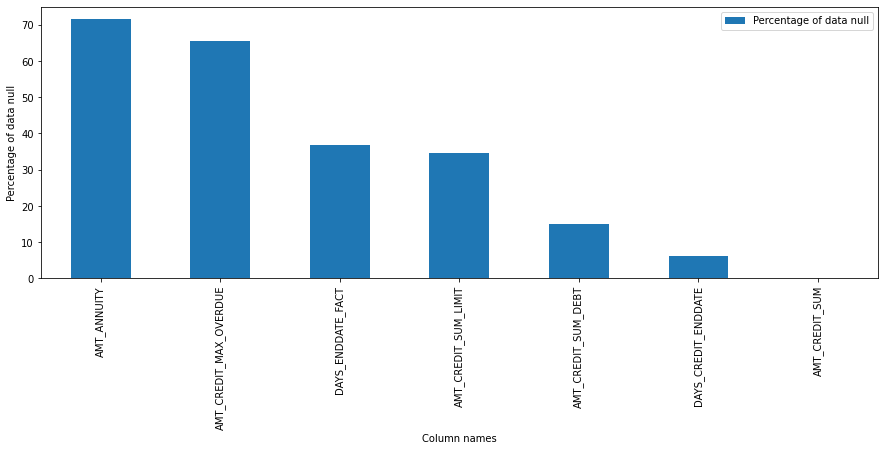

In [ ]:
print("Number of rows in bureau_balance dataset:",bureau.shape[0])
print("Number of features in bureau_balance dataset:",bureau.shape[1],"\n")

separate_cols(bureau)
print("\n")
bureau_null = count_null(bureau, (15,5))

## **Dataset: bureau_balance**

In [ ]:
print("Number of rows in bureau_balance dataset:",bureau_balance.shape[0])
print("Number of features in bureau_balance dataset:",bureau_balance.shape[1],"\n")

separate_cols(bureau_balance)
print("\n")
bureau_balance_null = count_null(bureau_balance, (25,10))

Number of rows in bureau_balance dataset: 27299925
Number of features in bureau_balance dataset: 3 

The numerical columns are: ['SK_ID_BUREAU', 'MONTHS_BALANCE']
The categorical columns are: ['STATUS']




## **Dataset: POS_CASH_balance**

Number of rows in POS_CASH_balance dataset: 10001358
Number of features in POS_CASH_balance dataset: 8 

The numerical columns are: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
The categorical columns are: ['NAME_CONTRACT_STATUS']




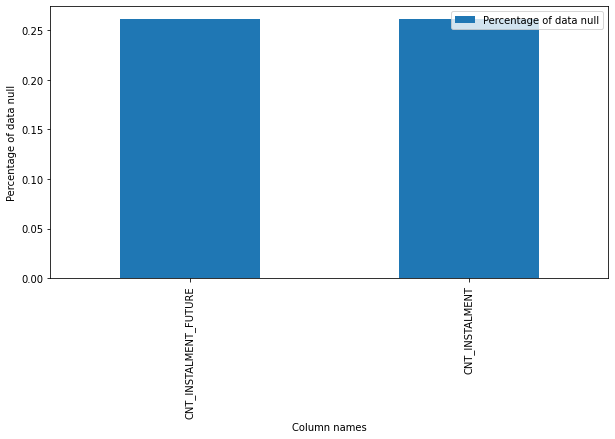

In [ ]:
print("Number of rows in POS_CASH_balance dataset:",POS_CASH_balance.shape[0])
print("Number of features in POS_CASH_balance dataset:",POS_CASH_balance.shape[1],"\n")

separate_cols(POS_CASH_balance)
print("\n")
POS_CASH_balance_null = count_null(POS_CASH_balance, (10,5))

## **Dataset: credit_card_balance**

Number of rows in credit_card_balance dataset: 3840312
Number of features in credit_card_balance dataset: 23 

The numerical columns are: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']
The categorical columns are: ['NAME_CONTRACT_STATUS']




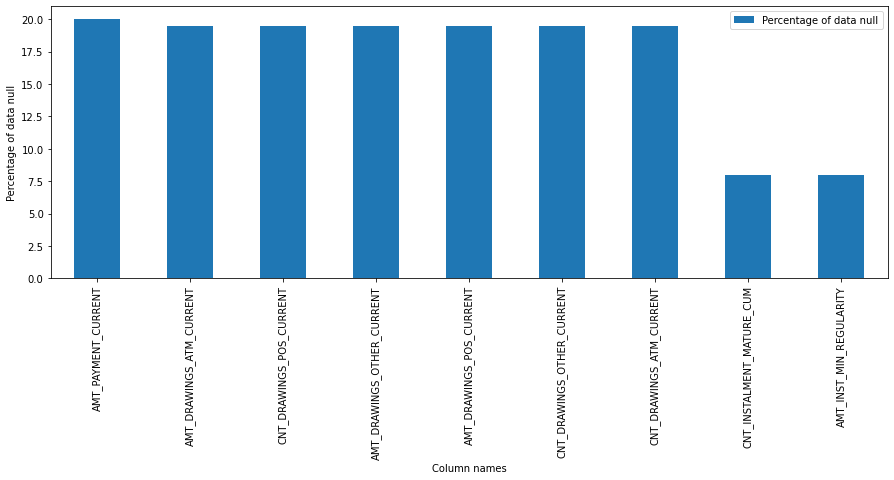

In [ ]:
print("Number of rows in credit_card_balance dataset:",credit_card_balance.shape[0])
print("Number of features in credit_card_balance dataset:",credit_card_balance.shape[1],"\n")

separate_cols(credit_card_balance)
print("\n")
credit_card_balance_null = count_null(credit_card_balance, (15,5))

## **Dataset: previous_application**

Number of rows in previous_application dataset: 1670214
Number of features in previous_application dataset: 37 

The numerical columns are: ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
The categorical columns are: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']




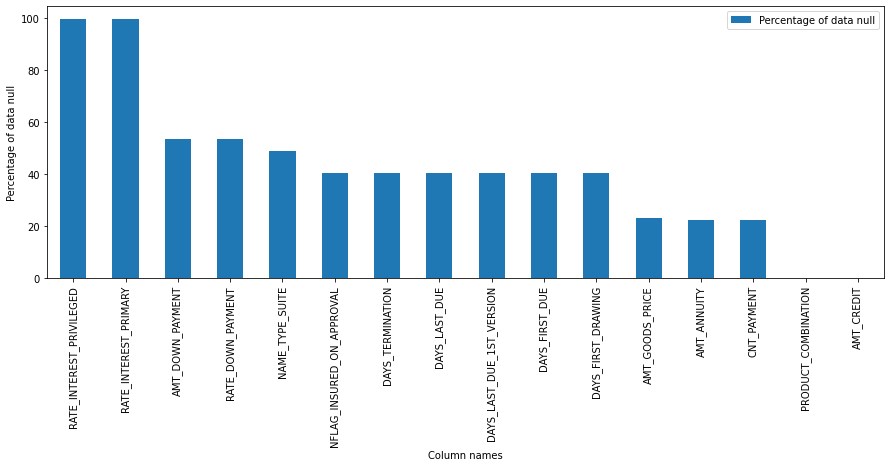

In [ ]:
print("Number of rows in previous_application dataset:",previous_application.shape[0])
print("Number of features in previous_application dataset:",previous_application.shape[1],"\n")

separate_cols(previous_application)
print("\n")
previous_application = count_null(previous_application, (15,5))

## **Dataset: installments_payments**

Number of rows in installments_payments dataset: 13605401
Number of features in installments_payments dataset: 8 

The numerical columns are: ['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']
The categorical columns are: []




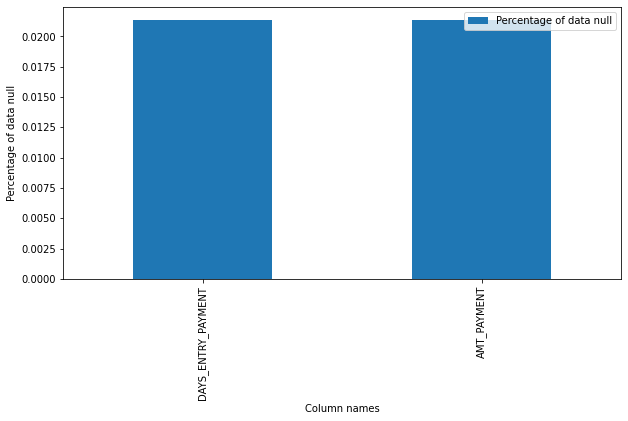

In [ ]:
print("Number of rows in installments_payments dataset:",installments_payments.shape[0])
print("Number of features in installments_payments dataset:",installments_payments.shape[1],"\n")

separate_cols(installments_payments)
print("\n")
installments_payments_null = count_null(installments_payments, (10,5))


# **Visualizing categorical data columns in application_train**
- **Customer counts per category**
- **Repayer and Defaulter counts per category**

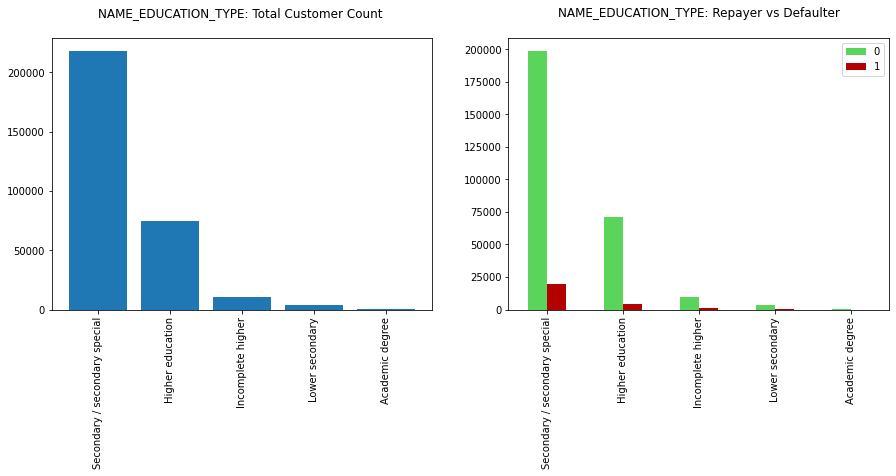

In [ ]:
plot_categorical(application_train, 'NAME_EDUCATION_TYPE', 'TARGET')

💡*From the above plot, it is clear that more people with a **secondary education** are defaulters.* 

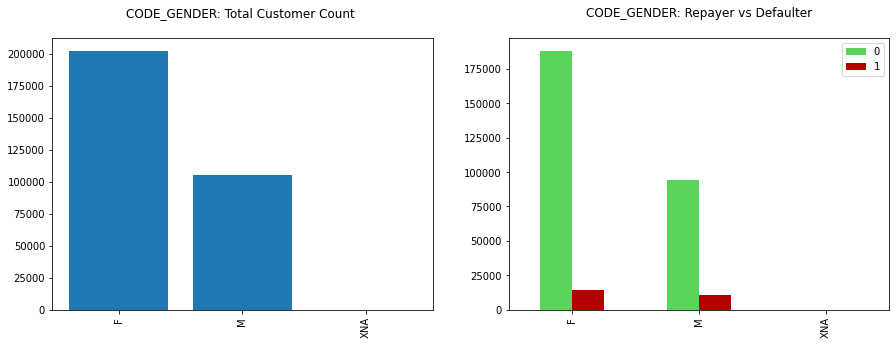

In [ ]:
plot_categorical(application_train, 'CODE_GENDER', 'TARGET')

💡*From the above plot, it is clear that there are **more females** who are defaulters than males.*

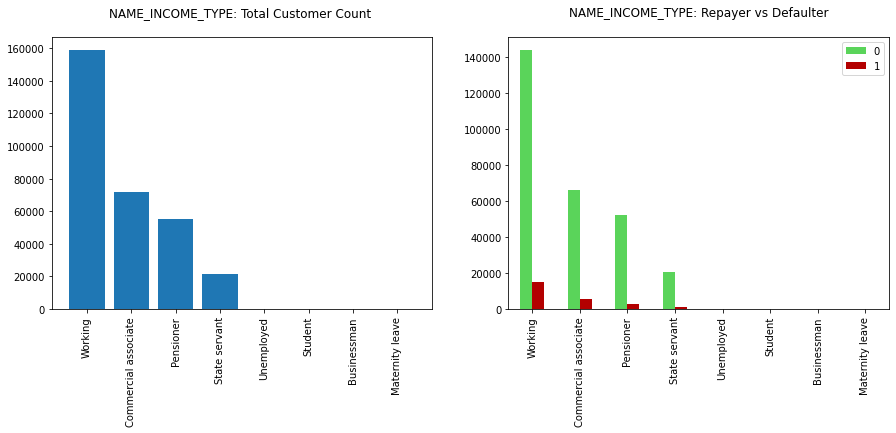

In [ ]:
plot_categorical(application_train, 'NAME_INCOME_TYPE', 'TARGET')

💡*From the above plot, it is clear that for **income type - working** there are more defaulters.*

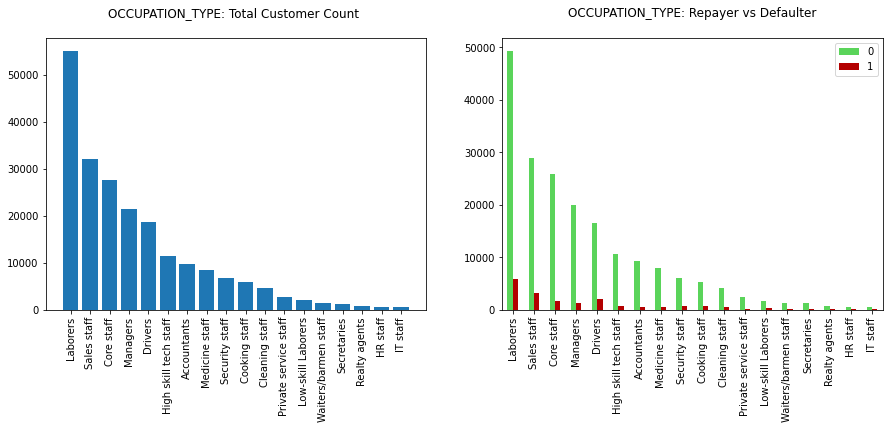

In [ ]:
plot_categorical(application_train, 'OCCUPATION_TYPE', 'TARGET')

💡*From the above plot, it is clear that for **occupation type - laborers** there are more defaulters as compared to other categories.*

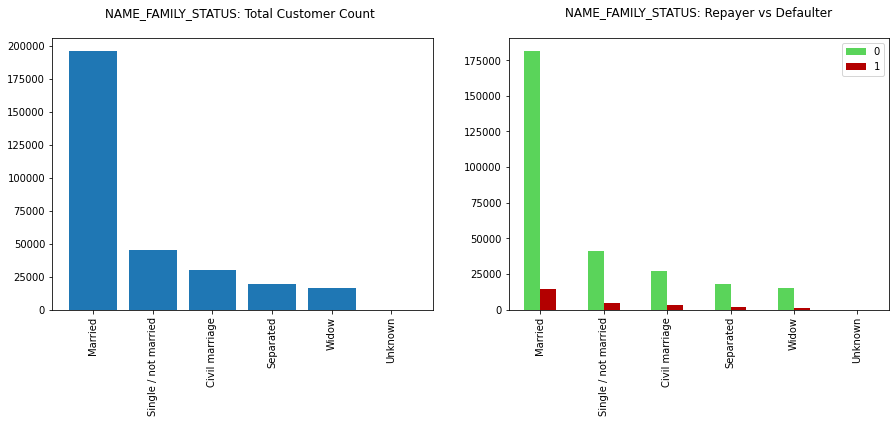

In [ ]:
plot_categorical(application_train, 'NAME_FAMILY_STATUS', 'TARGET')

💡*From the above plot, it is clear that for **family status - married** there are more defaulters as compared to other categories.*

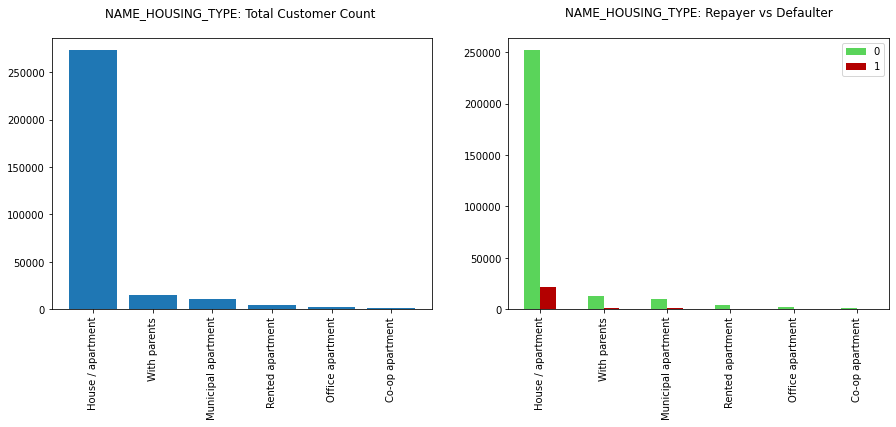

In [ ]:
plot_categorical(application_train, 'NAME_HOUSING_TYPE', 'TARGET')

💡*From the above plot, it is clear that for **housing type - House/apartment** there are more defaulters as compared to other categories*

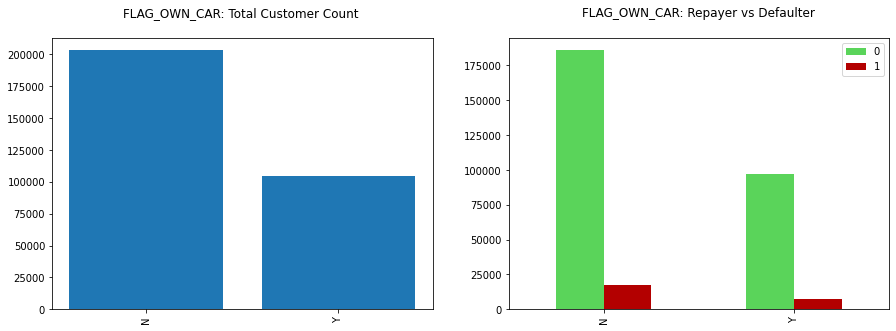

In [ ]:
plot_categorical(application_train, 'FLAG_OWN_CAR', 'TARGET')

💡*From the above plot, it is clear that for **people with no car** there are more defaulters as compared to people with a car.*

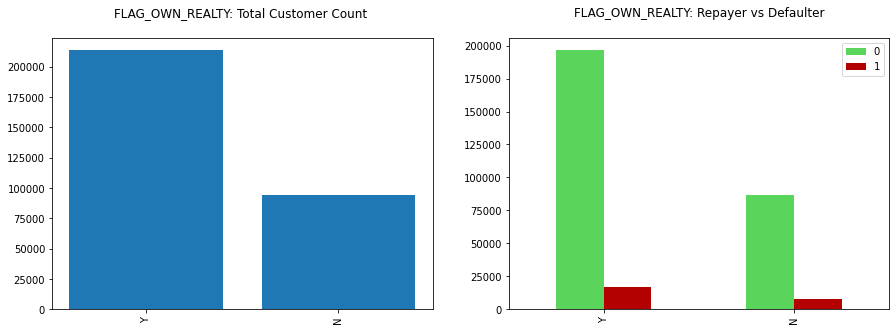

In [ ]:
plot_categorical(application_train, 'FLAG_OWN_REALTY', 'TARGET')

💡*From the above plot, it is clear that for **people with a house** there are more defaulters as compared to people with no houses.*

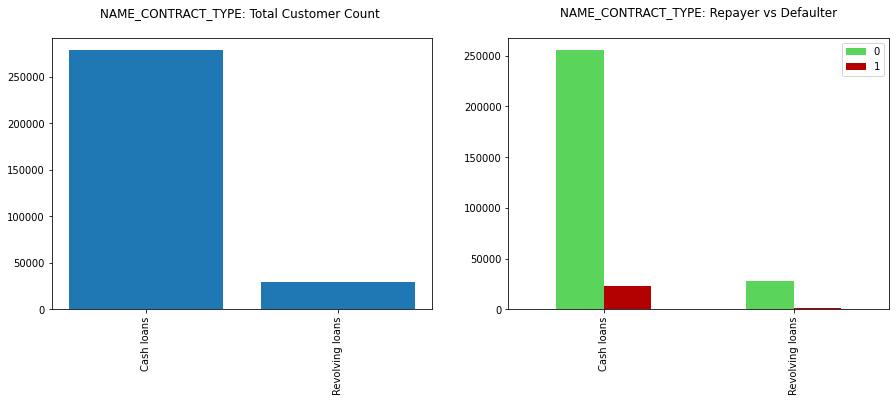

In [ ]:
plot_categorical(application_train, 'NAME_CONTRACT_TYPE', 'TARGET')

💡*From the above plot, it is clear that **people with cash loans** have a higher chance of being defaulters as compared to people with revolving loans.*

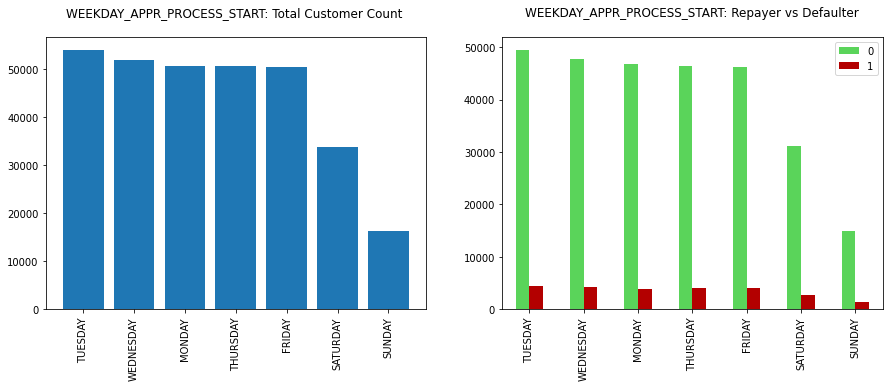

In [ ]:
plot_categorical(application_train, 'WEEKDAY_APPR_PROCESS_START', 'TARGET')

💡*No conn*

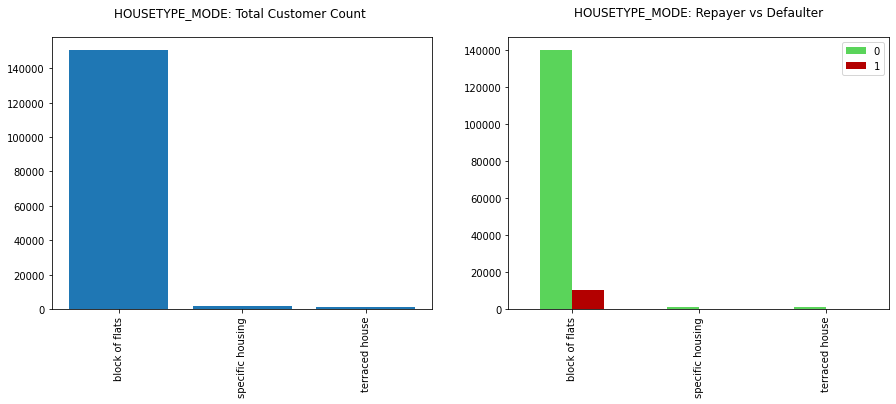

In [ ]:
plot_categorical(application_train, 'HOUSETYPE_MODE', 'TARGET')

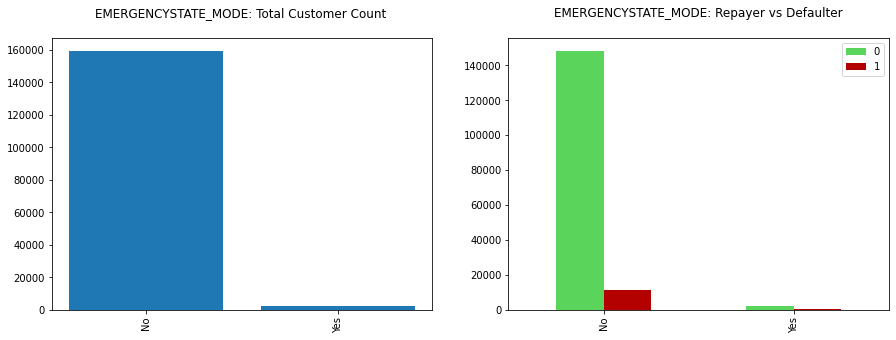

In [ ]:
plot_categorical(application_train, 'EMERGENCYSTATE_MODE', 'TARGET')

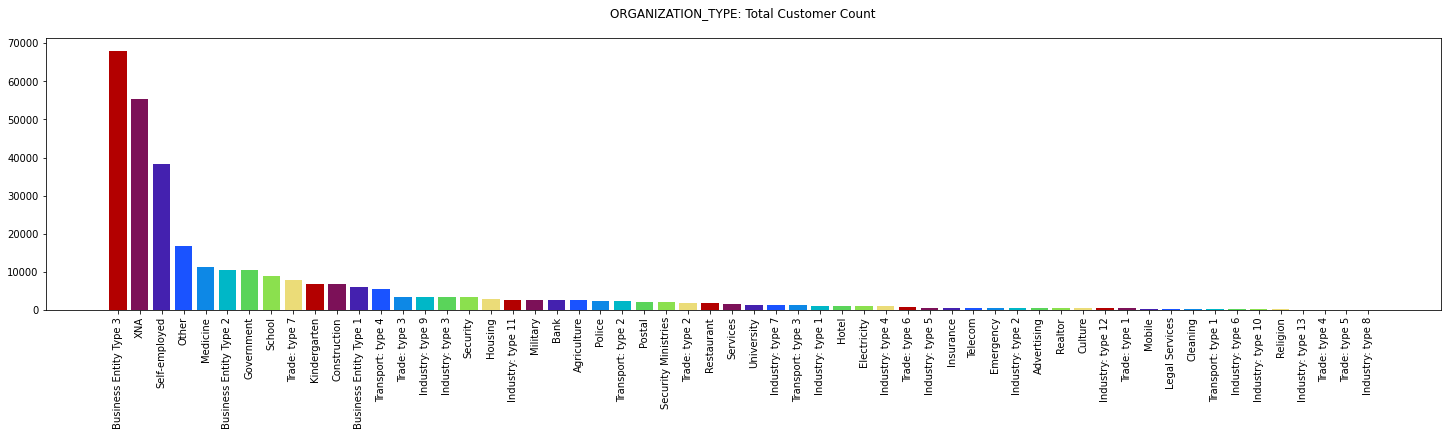

In [ ]:
import matplotlib.colors as colors
application_train_counts = application_train['ORGANIZATION_TYPE'].value_counts()
labels = application_train_counts.index
counts = application_train_counts.values

color = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]
plt.figure(figsize=(25,5))
plt.bar(labels, counts, color = color)
plt.xticks(labels, rotation = 90)
plt.grid(False)
plt.title(f"ORGANIZATION_TYPE: Total Customer Count\n")

plt.show()

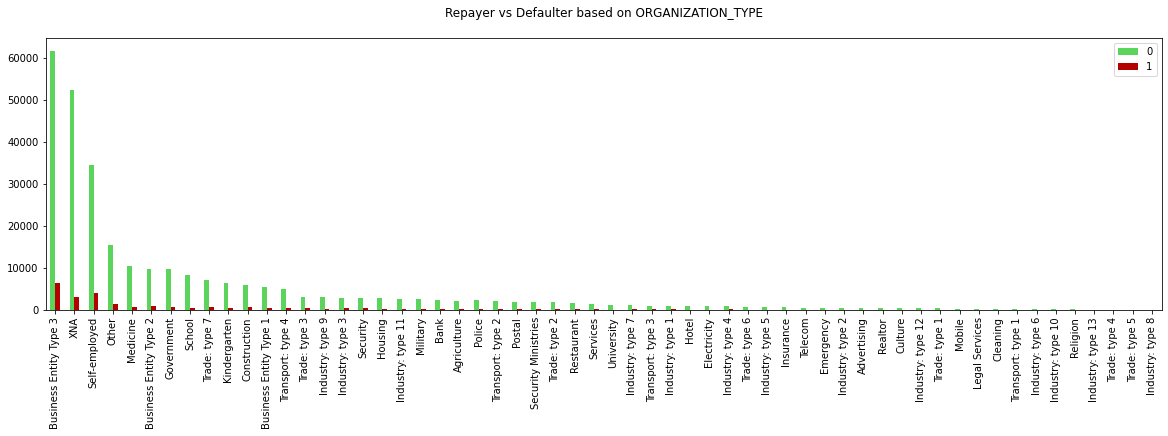

In [ ]:
title = "Repayer vs Defaulter based on ORGANIZATION_TYPE\n"

target_values = list(pd.unique(application_train['TARGET']))
columns = target_values.sort()

df = pd.DataFrame(columns = columns, index=labels)

for group, groupdf in application_train.groupby(['TARGET']):
    counts = groupdf['ORGANIZATION_TYPE'].value_counts()
    df[group] = counts

s = df.plot.bar(use_index = True, figsize = (20,5), title = title, color = ['#5ad45a','#b30000'])
plt.grid(False)

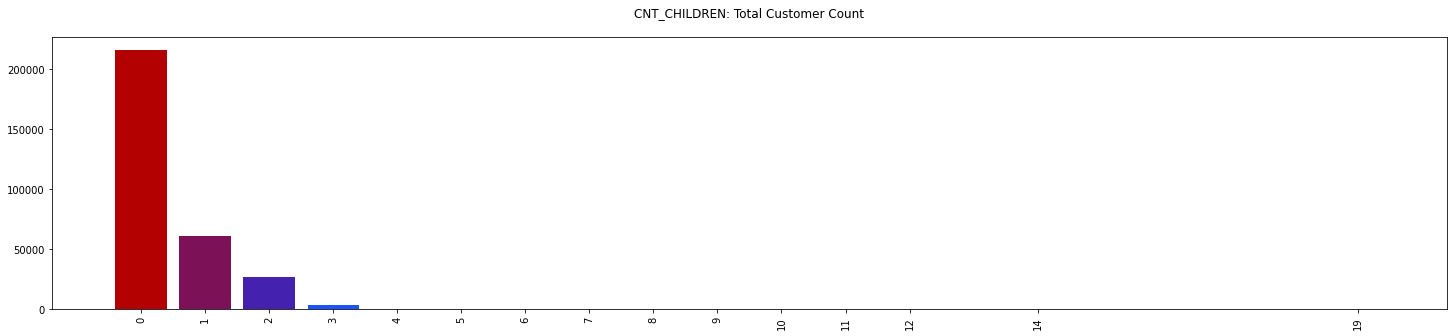

In [ ]:
import matplotlib.colors as colors
application_train_counts = application_train['CNT_CHILDREN'].value_counts()
labels = application_train_counts.index
counts = application_train_counts.values

color = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]
plt.figure(figsize=(25,5))
plt.bar(labels, counts, color = color)
plt.xticks(labels, rotation = 90)
plt.title(f"CNT_CHILDREN: Total Customer Count\n")

plt.show()

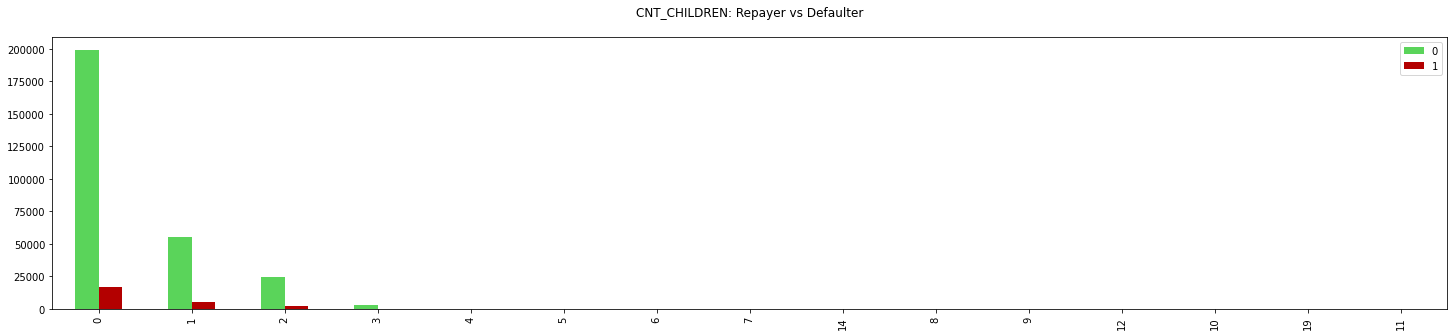

In [ ]:
title = "CNT_CHILDREN: Repayer vs Defaulter\n"

target_values = list(pd.unique(application_train['TARGET']))
columns = target_values.sort()

df = pd.DataFrame(columns = columns, index=labels)

for group, groupdf in application_train.groupby(['TARGET']):
    counts = groupdf['CNT_CHILDREN'].value_counts()
    df[group] = counts

s = df.plot.bar(use_index = True, figsize = (25,5), title = title, color = ['#5ad45a','#b30000'])

In [ ]:
cols = [
    'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'
]

In [ ]:
def count_dist_plots(data, cols, target):
    
    for col in cols:
        fig , (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,5))
        sns.countplot(data = data, x= col, ax = ax1).set_title(f"{col}: Total Customer Count")
        sns.countplot(data = data, x= col, hue = target, ax = ax2, palette = ['#5ad45a','#b30000']).set_title(f"{col}: Repayer vs Defaulter")
        sns.distplot(data[col].dropna(), bins = 20, color = 'r', ax = ax3).set_title(f"Distribution of {col}")

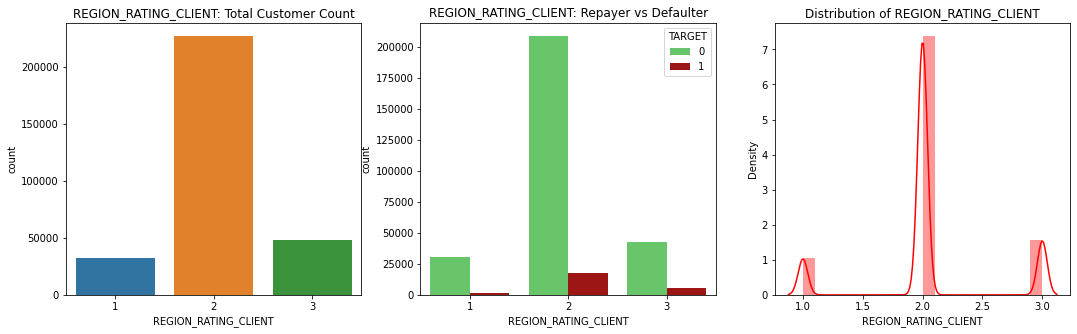

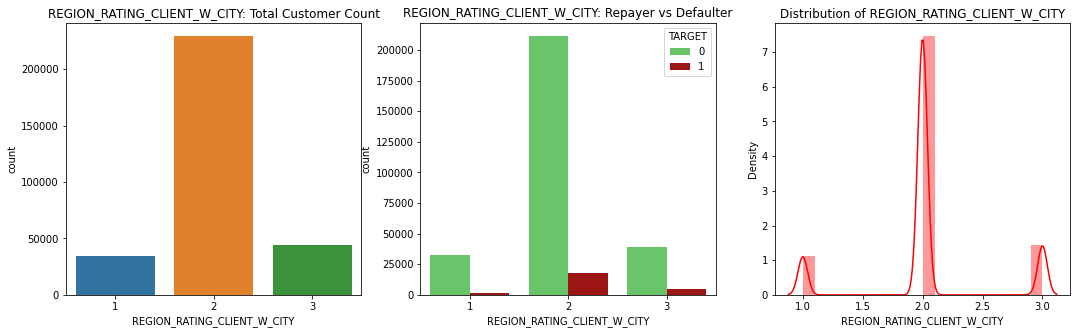

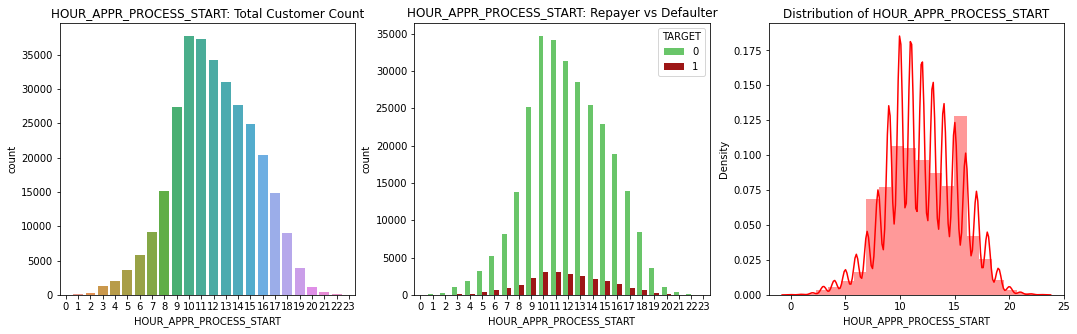

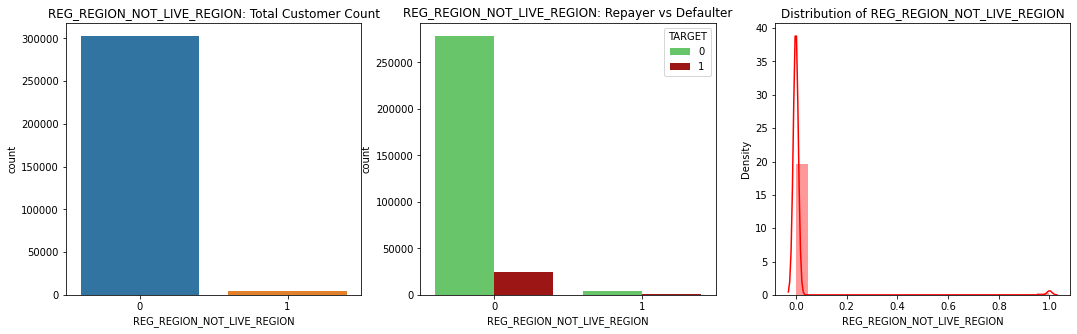

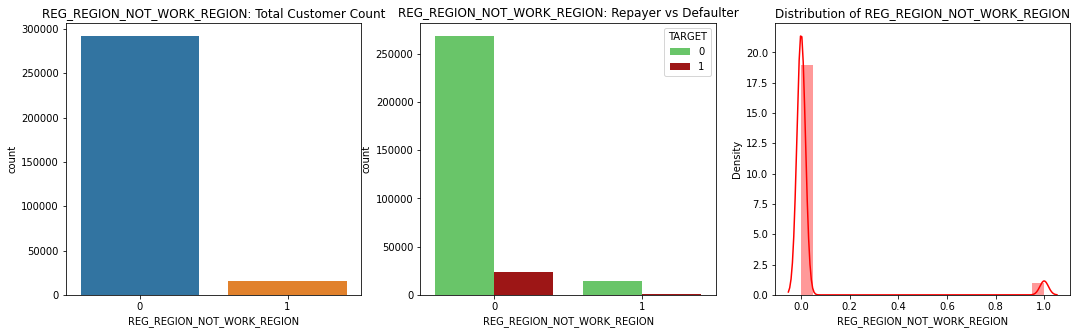

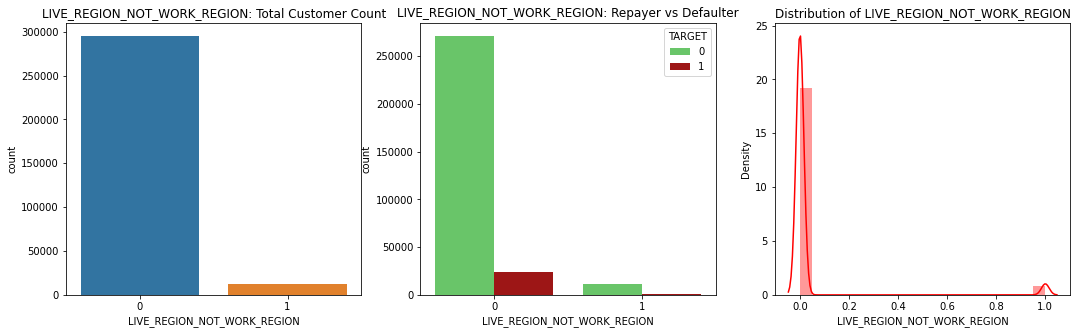

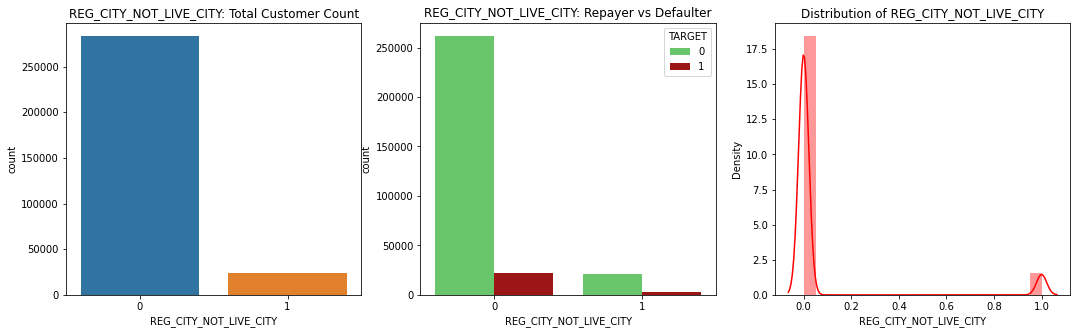

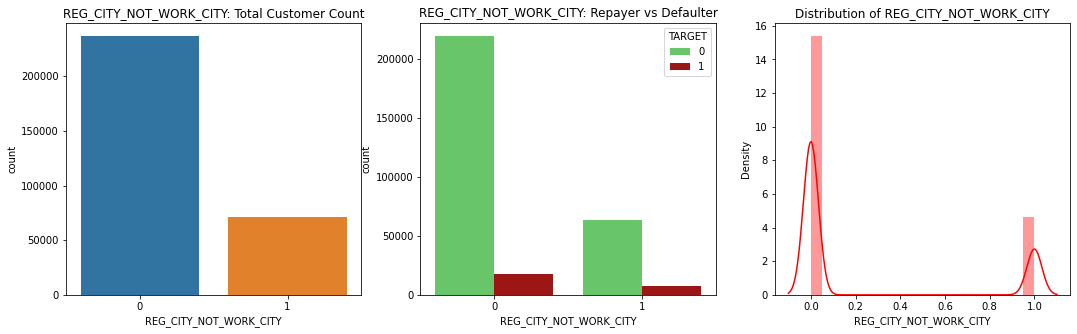

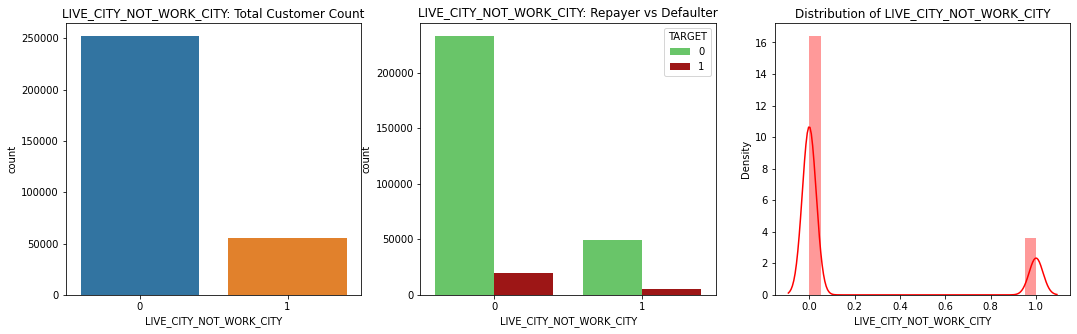

In [ ]:
count_dist_plots(application_train, cols, 'TARGET')

# **Visualizing numerical data columns in application_train**
- **Distribution of data**

## **Average related data columns**

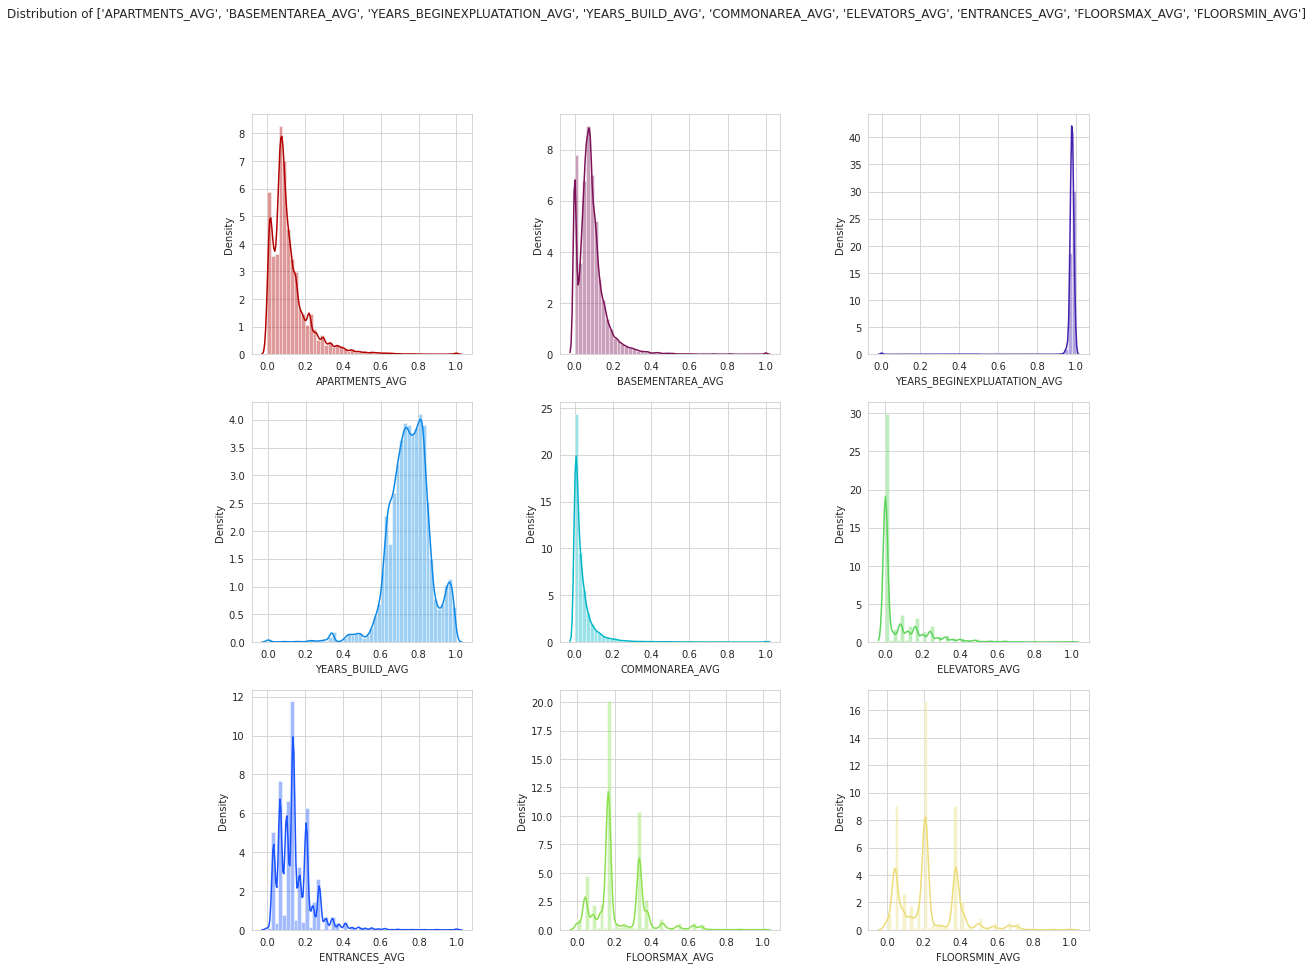

In [ ]:
avg_cols = [
    'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
    'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG'
]

distribution_plots(application_train, avg_cols)

## **Amount related data columns**

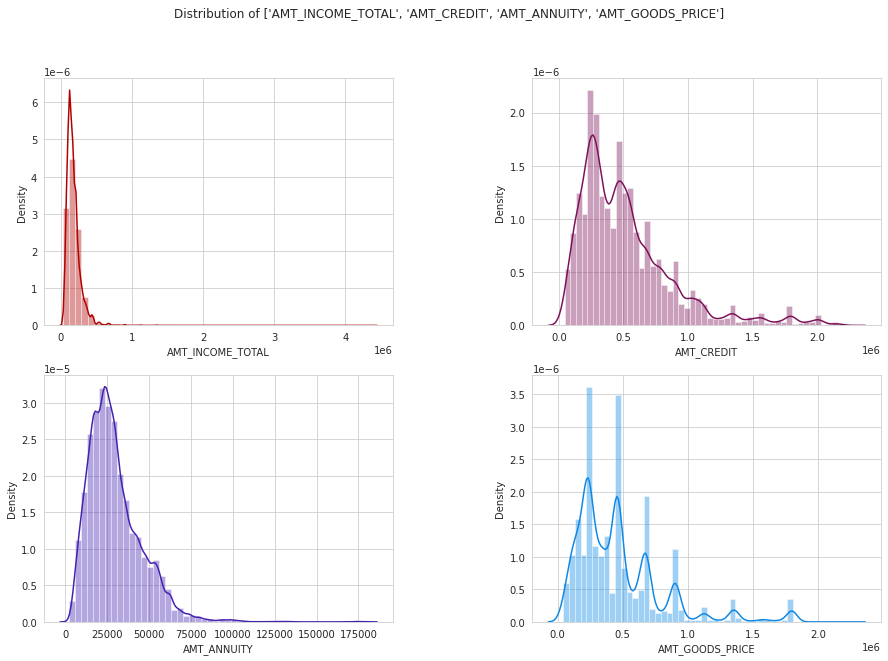

In [ ]:
distribution_plots(application_test, ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])

## **Days related data columns**

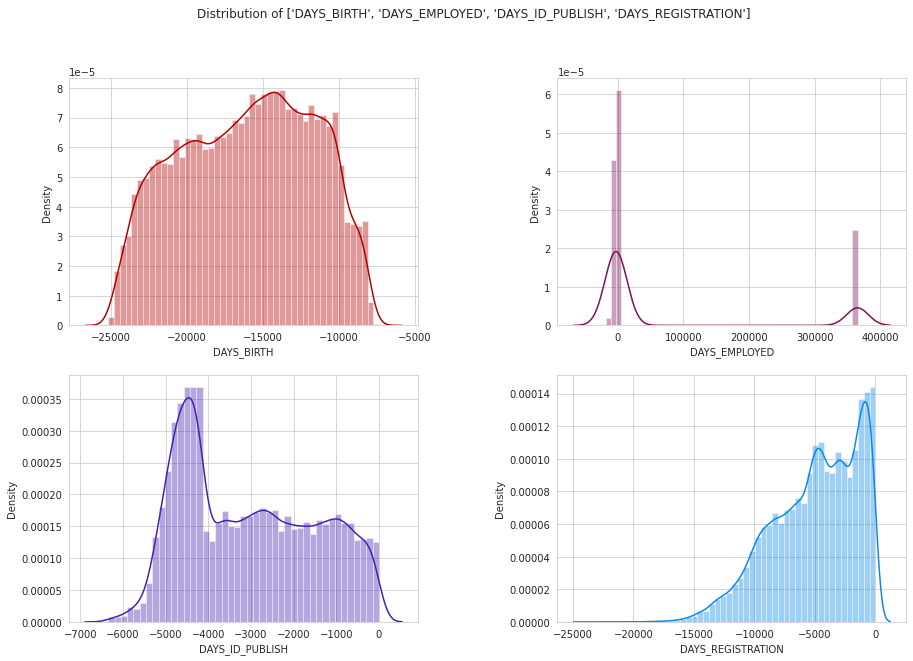

In [ ]:
distribution_plots(application_test, ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION'])

## **Source related data columns**

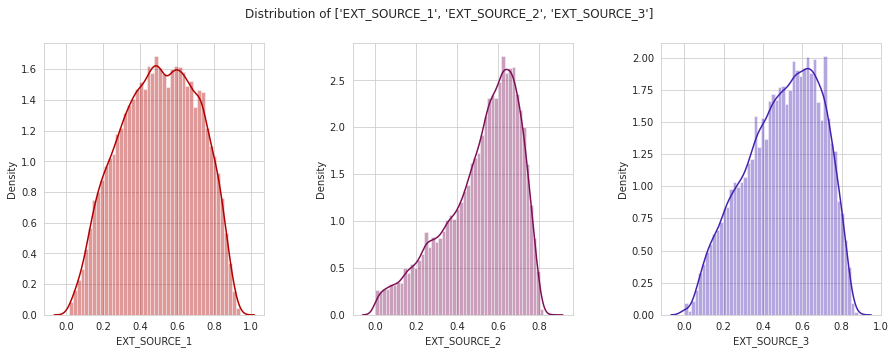

In [ ]:
distribution_plots(application_test, ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'])

# **Correlation between features in application_train**

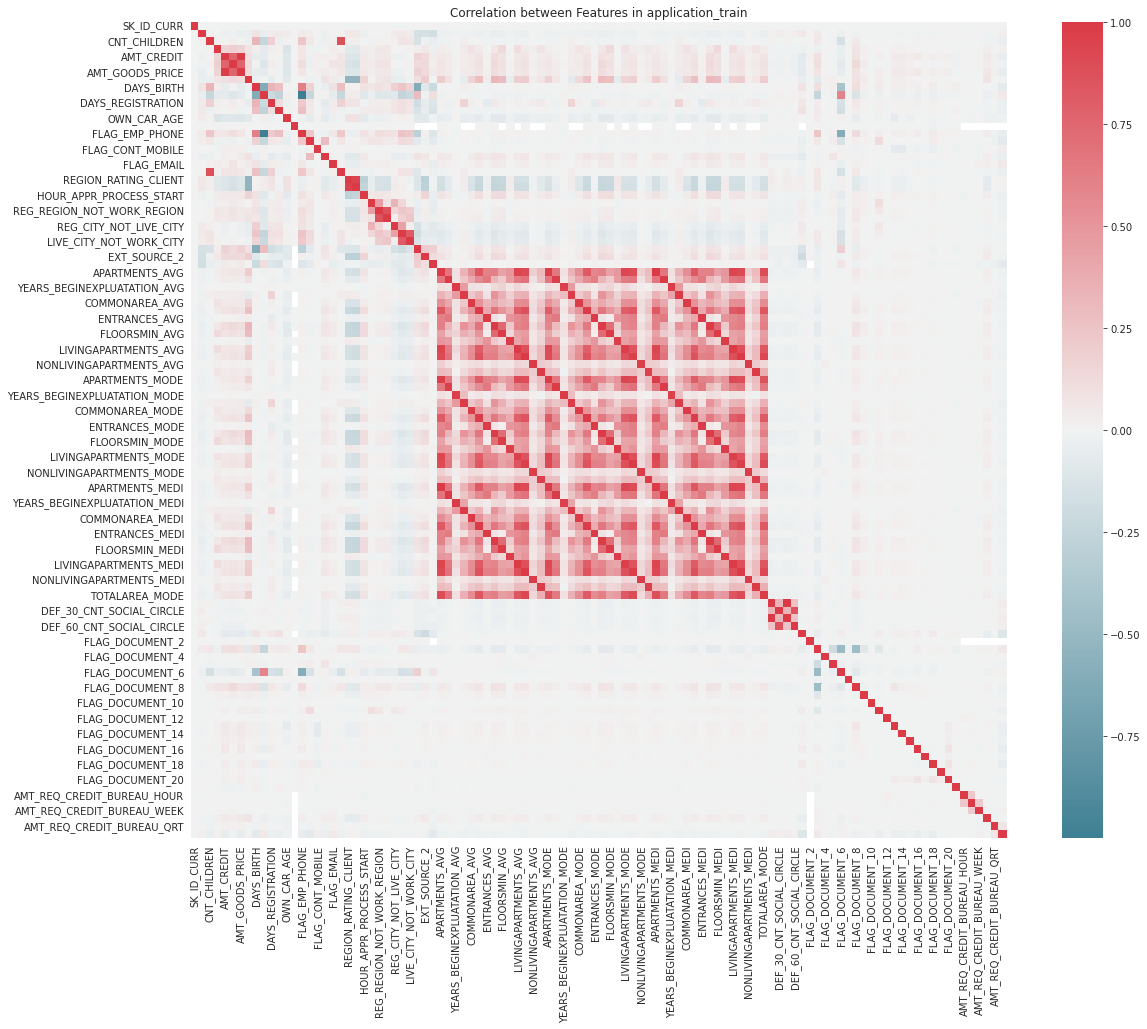

In [ ]:
fig , ax = plt.subplots(figsize = (20,15))
colormap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(application_train.corr(), cmap = colormap, square = True, xticklabels = 'auto')
plt.title("Correlation between Features in application_train")
plt.show()

## **Visualizing most correlated features**

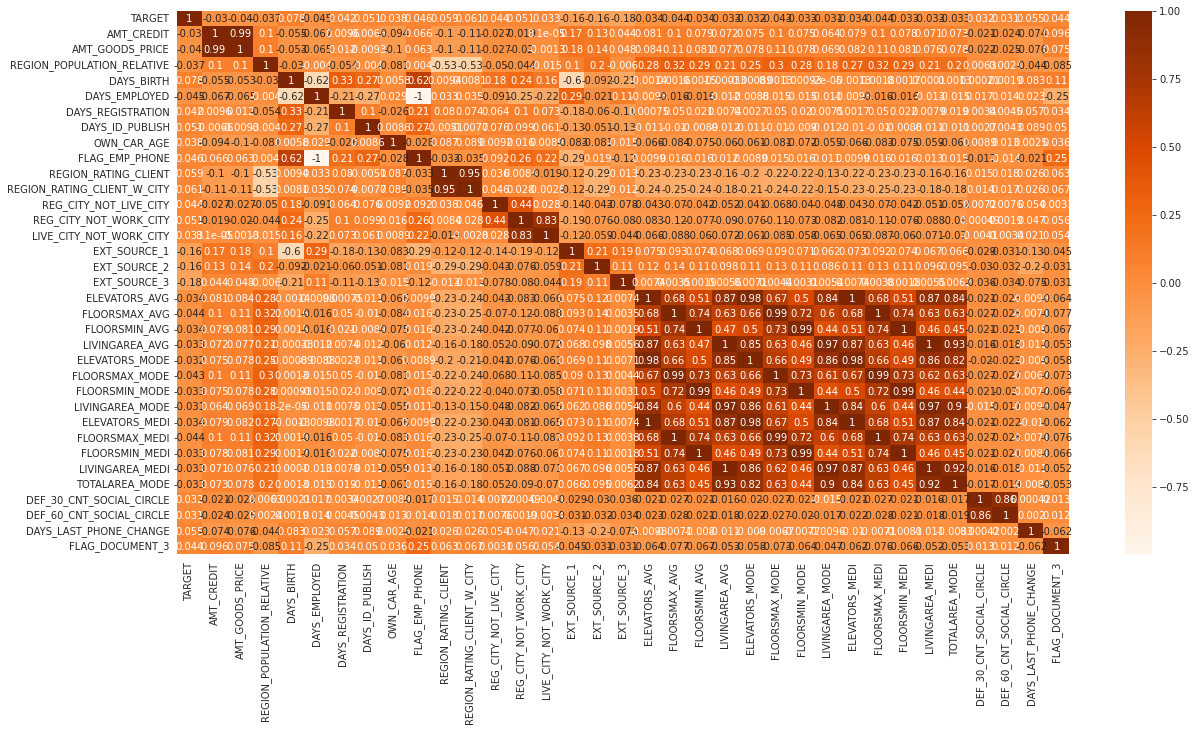

In [ ]:
plt.figure(figsize = (20,10))

corr = application_train.corr()
top_corr_index = corr.index[abs(corr['TARGET']) > 0.03]
g = sns.heatmap(application_train[top_corr_index].corr(), annot = True, cmap = 'Oranges')

# **Analysing Bureau Data**

In [ ]:
ap_train = application_train
br_data = bureau

In [ ]:
print("Dataset shape before merging:", ap_train.shape)
ap_train = ap_train.merge(br_data, how = 'inner', on = 'SK_ID_CURR')
print("Dataset shape after merging:", ap_train.shape)

Dataset shape before merging: (307511, 122)
Dataset shape after merging: (1465325, 138)


## **Visualizing categorical data columns**
- **Customer counts per category**
- **Repayer and Defaulter counts per category**

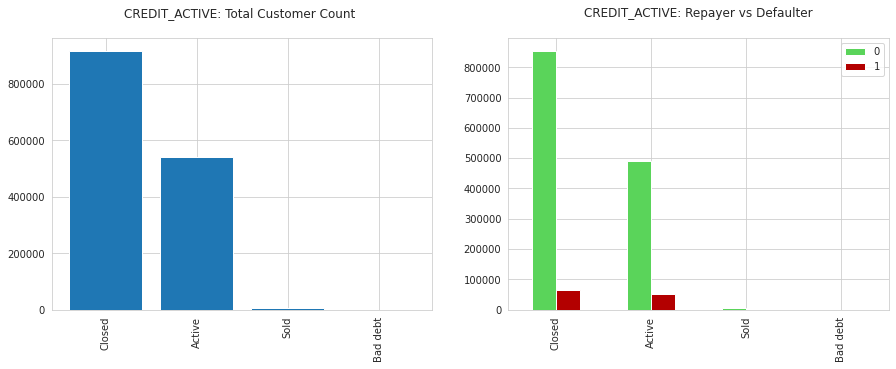

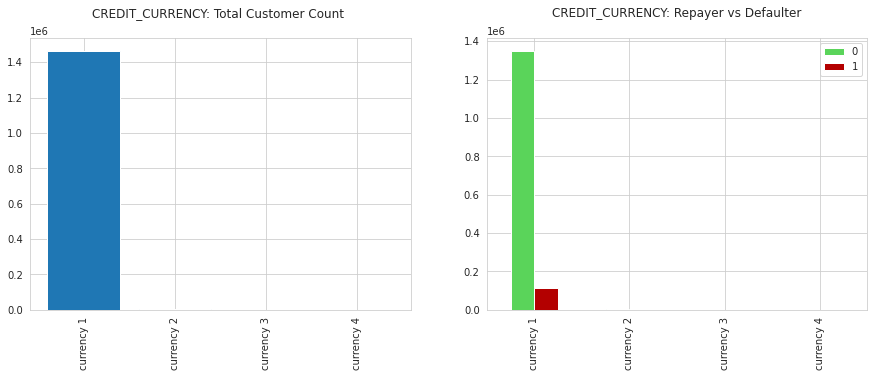

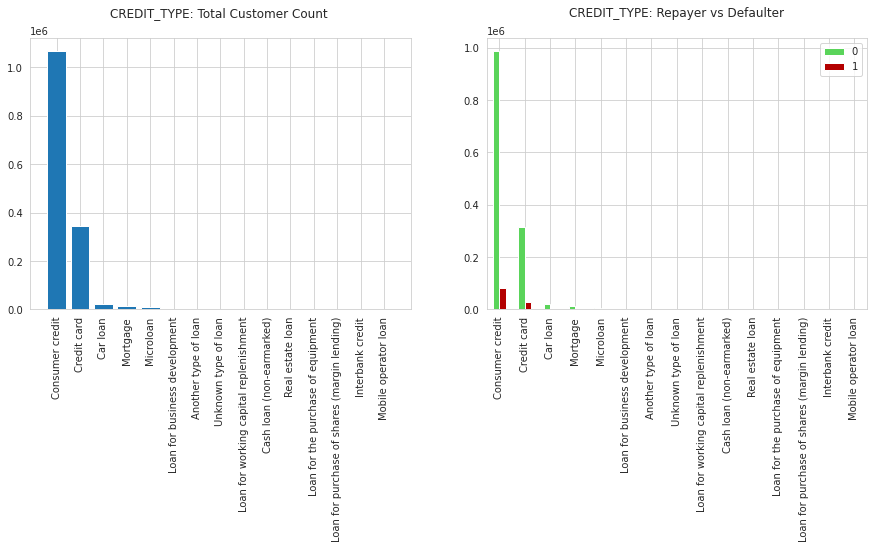

In [ ]:
plot_categorical(ap_train, 'CREDIT_ACTIVE', 'TARGET')
plot_categorical(ap_train, 'CREDIT_CURRENCY', 'TARGET')
plot_categorical(ap_train, 'CREDIT_TYPE', 'TARGET')

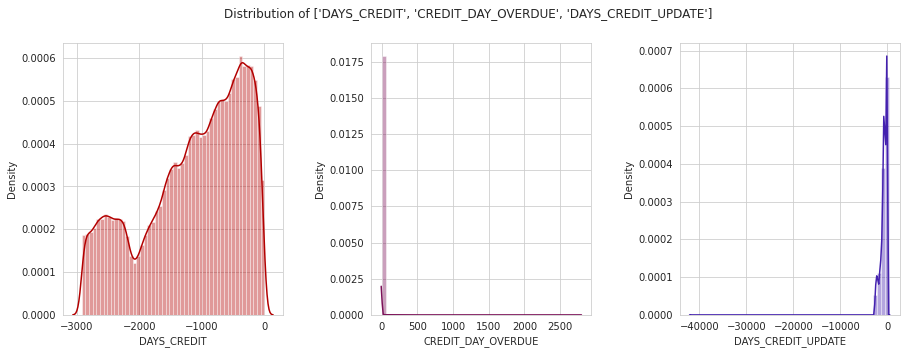

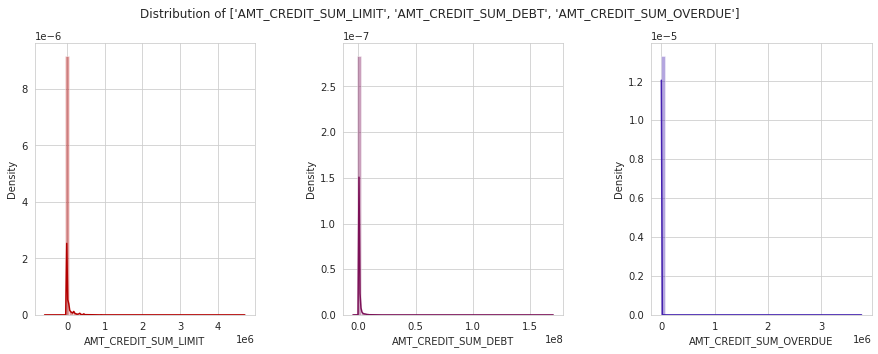

In [ ]:
br_cols1 = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','DAYS_CREDIT_UPDATE']
br_cols2 = ['AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_OVERDUE']
distribution_plots(ap_train,br_cols1)
print("\n")
distribution_plots(ap_train,br_cols2)

# **Analysing bureau_balance Dataset**

## **Visualizing categorical data columns**
- **Customer counts per category**
- **Repayer and Defaulter counts per category**

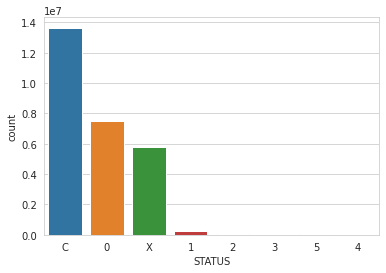

In [ ]:
sns.countplot(data = bureau_balance, x = 'STATUS')

# **Analysing previous_application Dataset**

In [ ]:
def count_plots(data, cols):
    
    sns.set_style('whitegrid')
    color = ["#b30000", "#7c1158", "#4421af", "#0d88e6", "#00b7c7", "#5ad45a", "#1a53ff", "#8be04e", "#ebdc78"]

    l = len(cols)
    if l%2 == 0:
        fig, ax = plt.subplots(nrows = l//2,ncols = 2, figsize = (15,5* l//2))
    else:
        fig, ax = plt.subplots(nrows = l//3 ,ncols = 3, figsize = (15,5 * l//3))
    
    plt.subplots_adjust(wspace = 0.4)
    plt.xticks(labels, rotation = 90)

    for clr,col,plt_axes in zip(color, cols, ax.flat):
        sns.countplot(data[col].dropna(), color = clr, ax = plt_axes)
        plt_axes.set_xticklabels(labels, rotation = 90)
        #plt_axes.ticklabel_format(style = 'plain', axis = 'x')
        #plt_axes.ticklabel_format(style = 'plain', axis = 'y')
    
    plt.suptitle(f"Count of {cols}")

In [ ]:
col1 = [
    'NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
    'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE'
]
col2 = [
    'CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE',
    'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE'
]
col3 = ['CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']


KeyError: ignored

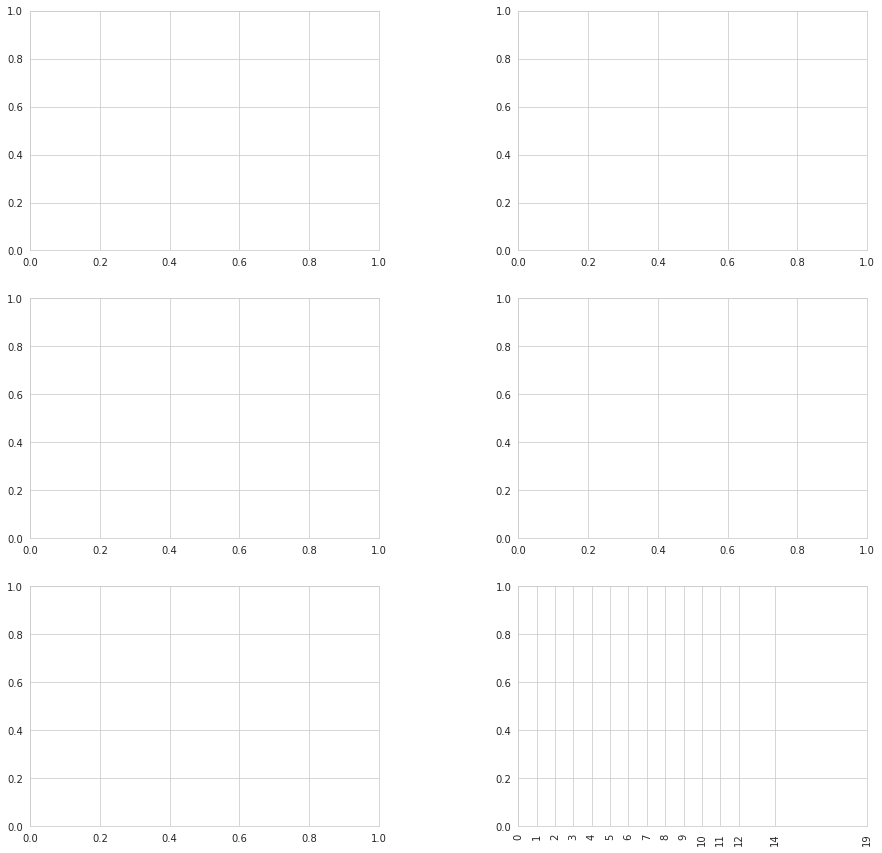

In [ ]:
count_plots(previous_application,col1)

In [ ]:
count_plots(previous_application,col2)

In [ ]:
count_plots(previous_application,col3)

In [ ]:
previous_app_num = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']
distribution_plots(previous_application, previous_app_num)